In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col='Unnamed: 0')
y = pd.read_csv('train_answers.csv', index_col='Unnamed: 0')
test = pd.read_csv('test.csv', index_col='Unnamed: 0')
answers = pd.read_csv('real_answers_for_test.csv', index_col='Unnamed: 0')

In [3]:
print('train shape: ', train.shape)
print('y shape: ', y.shape)
print('test shape: ', test.shape)
print('answer shape: ', answers.shape)

train shape:  (426, 31)
y shape:  (426, 1)
test shape:  (143, 31)
answer shape:  (143, 1)


I. Calculate the distance to all train set.

In [4]:
distLst = []
for m in range(len(test)):
    inner_list = []
    for i in range(len(train)):
        distance = np.linalg.norm(test.iloc[m]-train.iloc[i])
        inner_list.append(distance)
    distLst.append(inner_list)

II. Find the Minimum distance and predict to according it’s label. 

In [5]:
def forNearestNeighbor(k):
    storage = []
    for i in range(len(distLst)):
        sorted_distLst = sorted(distLst[i])[:k]
        indices = [distLst[i].index(inx) for inx in sorted_distLst]
        ans_by_inx = [y.iloc[ix][0] for ix in indices]
        my_dictionary = {i: ans_by_inx.count(i) for i in ans_by_inx}
        result = max(my_dictionary, key=my_dictionary.get)
        storage.append(result)
    return storage
correct_answers = answers["diagnosis"].tolist()

In [6]:
def checkAccuracy(k):
    accuracy = []
    for v in k:
        ac=1
        for z in range(len(correct_answers)):
            if forNearestNeighbor(v)[z]!=correct_answers[z]:
                ac-=1/len(correct_answers)
        accuracy.append(ac)
    return accuracy

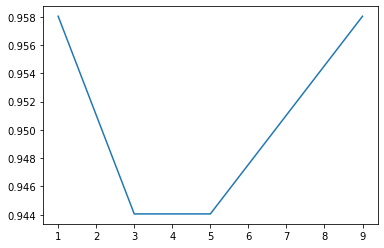

In [7]:
k = [1, 3, 5, 7, 9]
accuracy = checkAccuracy(k)
plt.plot(k, accuracy)
plt.show();

In [8]:
# import matplotlib.pyplot as plt
# from sklearn.neighbors import KNeighborsClassifier 
# neighbors = [1,3,5,7,9]
# test_accuracy = np.empty(len(neighbors))
# for i, k in enumerate(neighbors):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(train, y)
#     test_accuracy[i] = knn.score(test, answers)
# plt.title('k-NN: Varying Number of Neighbors')
# plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Accuracy')
# plt.show();

### Part 2.

I. findClosestCentroids function:

In [9]:
def findClosestCentroids(X, centroids):  
    v = centroids.shape[0]
    z = X.shape[0]
    idx = np.zeros(z)
    for i in range(z):
        minimum_distance = 999999
        for j in range(v):
            distance = np.sum((X[i,:]-centroids[j,:])**2)
            if distance<minimum_distance:
                minimum_distance = distance
                idx[i] = j
    return idx

In [10]:
data = loadmat('ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [11]:
idx = findClosestCentroids(X, initial_centroids)

In [12]:
print('Closest centroids for the first 3 examples: ')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples: 
[0. 2. 1.]
(the closest centroids should be 0, 2, 1 respectively)


II. computeCentroids function:

In [13]:
def computeCentroids(X, idx, K):  
    m, z = X.shape
    centroids = np.zeros((K, z))
    for i in range(K):
        index = np.where(idx == i)
        centroids[i,:] = (np.sum(X[index,:], axis=1)/len(index[0])).ravel()
    return centroids

In [14]:
K = 3

In [15]:
centroids = computeCentroids(X, idx, K)

In [16]:
print('Centroids computed after initial finding of closest centroids: ')
print(centroids)

Centroids computed after initial finding of closest centroids: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [17]:
max_iters = 10
for i in range(max_iters):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, K)

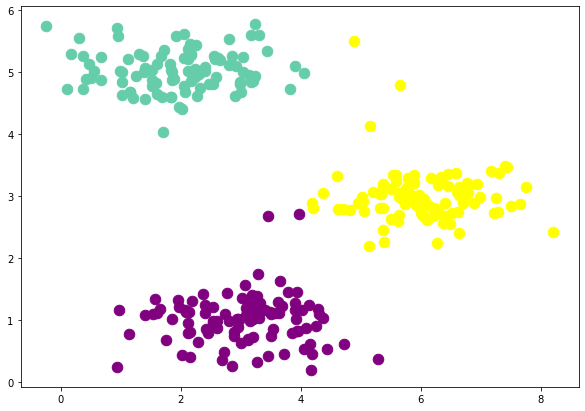

In [22]:
mediumaquamarine = X[np.where(idx==0)[0],:]  
purple = X[np.where(idx==1)[0],:]  
yellow = X[np.where(idx==2)[0],:]
fig, ax = plt.subplots(figsize=(10,7))  
ax.scatter(mediumaquamarine[:,0], mediumaquamarine[:,1], s=111, color='mediumaquamarine')  
ax.scatter(purple[:,0], purple[:,1], s=111, color='purple')  
ax.scatter(yellow[:,0], yellow[:,1], s=111, color='yellow');